# To Boldly Assign Genders That No Man Has Assigned Before

Dr. McCoy strolled onto the bridge of the starship _Enterprise,_ smiling like a boy with
a rare baseball card.

“I have found something that will amaze _even you_,” he told Mr. Spock.

The science officer looked up from his scope, but said nothing.

“As you all know,” McCoy said, addressing the entire bridge crew, “in the dominant species
of Butler III, both males and females have the same…” His voice faltered. “Parts.”

“Genitalia,” Spock said.

“_I_ didn’t know that,” Captain Kirk said. The officers who had been looking at McCoy,
trying not to smile, turned their gaze to Kirk. “What?” he said.

Spock raised both his eyebrows. “I believe we all had certain logical expectations.”

“Paperwork,” the captain said, “distracts me from every kind of obsession.” The Butler system lay in
unclaimed territory between Federation and Klingon space. Starfleet was determined to prevent an
alliance between Butler III and the Klingons.

“Even _I_ know about the Butlerians’ ‘parts,’” Uhura said.
“As soon as we made orbit, I cracked the encryption on their satellite entertainment network. I can recommend—”

Kirk raised a hand. “Consider me fully briefed. Bones, can you get to the amazing part?”

“Lieutenant Carmine, from Xenobiology, just sent me her report from the surface. It turns
out that male and female Butlerians have the same _internal_ reproductive organs, as
well. All the men are capable of getting pregnant, and all the women are capable of
siring children. But they _don’t._ It’s absolutely taboo.”

Kirk asked, “Does it make any sense to call the Butlerians ‘men’ and ‘women,’ if
they’re all the same sex, like tribbles?”

<figure style="width: 40%; float: right; border: 1px solid black; padding: 1em; margin: 0.5em; background-color: beige">
    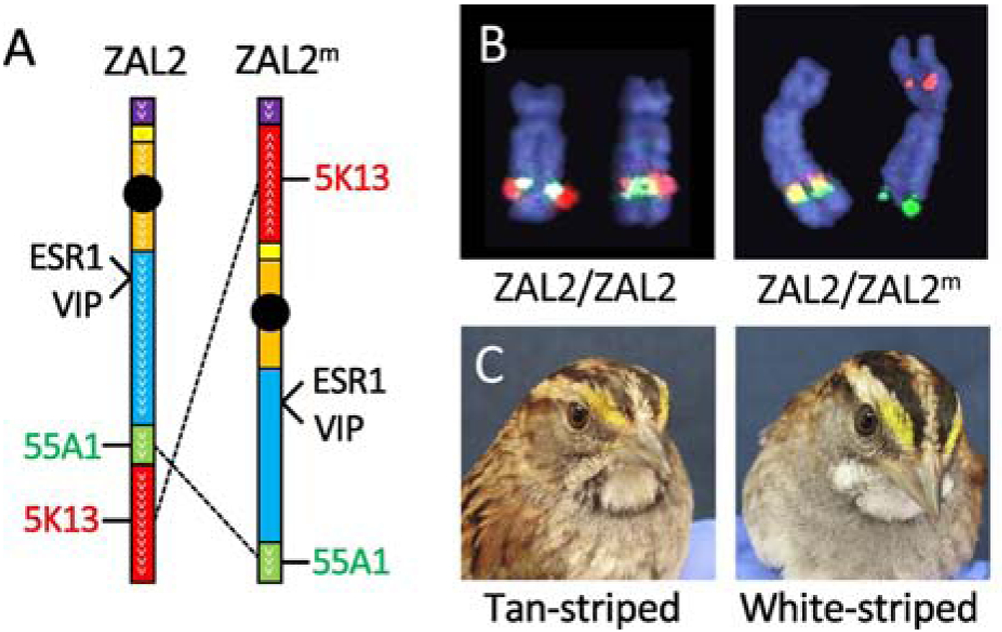
    <figcaption>
        Variants of <i>Z. albicollis</i> second chromosome.
        Tan-striped males mate with white-striped females,
        and white-striped males mate with tan-striped females.
    </figcaption>
</figure>

“If their entire species sorts itself into two categories,” Spock said, “and individuals
do not mate with members of their own category—even if such reproduction is technically
possible—it is correct to describe those categories as two sexes. On Earth, the
white-throated sparrow, _Zonotrichia albicollis_, has
[four sexes](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7725849/), and there are fungal species
with [thousands of sexes](https://www.discovermagazine.com/planet-earth/why-this-fungus-has-over-20-000-sexes).”

McCoy said, “The Butlerians think of themselves as having two sexes, and it’s
obvious to them who the men are and who the women are. But there doesn’t seem to
be any single biological marker that determines their sex. They can just… recognize it.”

“Even with their clothes off,” Uhura said.

“So,” McCoy went on, “Lieutenant Carmine wanted to figure out exactly where this
recognition comes from, and she started gathering data, and she almost has a paper
ready for the _Vulcan Journal of Xenobiology._”

“Well,” Kirk said, “even from meeting their diplomatic staff, it’s obvious that the
men tend to be taller than the women.”

“Also, longer,” Uhura said. “In certain dimensions.”

McCoy inserted a microtape into Spock’s console. “Computer,” he said. “Open
Lieutenant Carmine’s biostatistics data file. Plot a histogram of the how male,
female, and total population heights are distributed.”

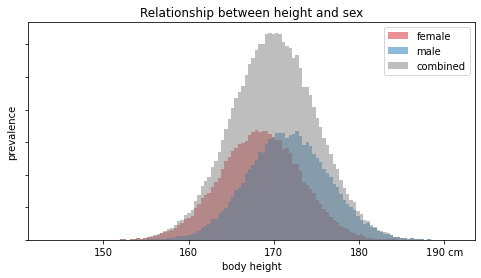

In [195]:
%matplotlib inline
import random
import math
import statistics
import matplotlib.pyplot as plt

def norm(mu=0.0, sigma=1.0):
    return random.normalvariate(mu, sigma)

class Butlerian(object):
    """Representation of one person from Butler III."""
    def __init__(self):
        self.traits = [
            norm() for _ in range(5)
        ]
        score = sum(self.traits)
        spin = norm()
        if score == spin:
            self.sex = random.choice(['m', 'f'])
        elif score < spin:
            self.sex = 'f'
        else:
            self.sex = 'm'
    
    @property
    def height(self):
        return self.traits[0]
    
    @property
    def vtl(self):
        return self.traits[1]

samples = [Butlerian() for _ in range(10**5)]

fig, ax = plt.subplots(figsize=(8, 4))
ax.set(
    title="Relationship between height and sex",
    yticklabels=[],
    ylabel="prevalence",
    xticks=[-4, -2, 0, 2, 4],
    xticklabels=['150', '160', '170', '180', '190 cm'],
    xlabel='body height'
)

ax.hist(
    [
        [s.height for s in samples],
        [s.height for s in samples if s.sex == 'm'],
        [s.height for s in samples if s.sex == 'f'],
    ],
    bins=120,
    histtype="stepfilled",
    color=["tab:gray", "tab:blue", "tab:red"],
    alpha=0.5
)
ax.legend(["female", "male", "combined"])

plt.show()

In [196]:
import statistics
m = statistics.mean([s.height for s in samples if s.sex == 'm'])
s = statistics.stdev([s.height for s in samples if s.sex == 'm'])
(m, s, 2 * (m / s))

(0.3299166486849261, 0.9508125704181525, 0.6939677891297418)

As his eyes scanned the image, Spock’s brain made calculations.
“The separation in height between the average male and female Butlerian is almost as
great as the separation in humans. But there is no genetic or hormonal distinction
between the sexes that creates this separation?”

McCoy shook his head.

“Fascinating,” Spock said. “But not, I regret to tell you, amazing.”

McCoy’s face fell.

“They also have different voices,” Uhura said. “The men and the women.”

“Yes,” said McCoy. “In Butlerians, as in humans, the average man has a lower-pitched
voice than the average woman. But short men with low voices are as common as tall men
with high voices. Computer, show us Figure Eight from Lieutenant Carmine’s paper.”

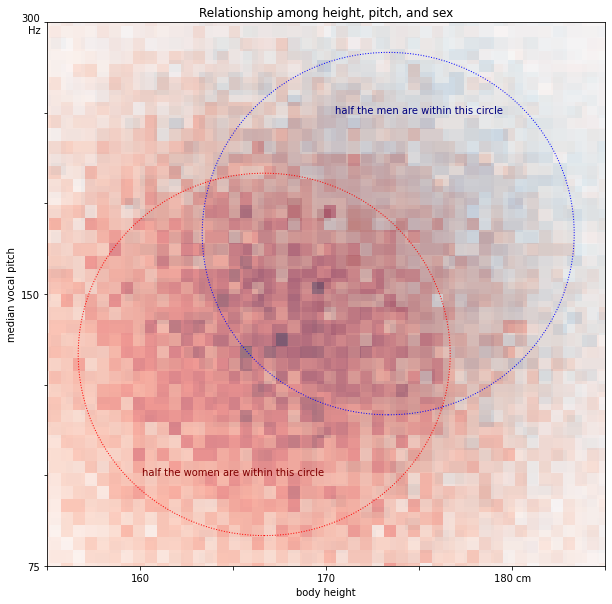

In [197]:
from matplotlib.patches import Circle
fig, ax = plt.subplots(figsize=(10, 10))
mhist = ax.hist2d(
    [s.height for s in samples if s.sex == 'm'],
    [s.vtl for s in samples if s.sex == 'm'],
    bins=120,
    cmap="Blues",
    alpha=0.5,
)
fhist = ax.hist2d(
    [s.height for s in samples if s.sex == 'f'],
    [s.vtl for s in samples if s.sex == 'f'],
    bins=120,
    cmap="Reds",
    alpha=0.5,
)
ax.set(xlim=(-1.5, 1.5),
       ylim=(-1.5, 1.5))
ax.set(
    title="Relationship among height, pitch, and sex",
    xticks=[-1.5, -1, -0.5, 0, 0.5, 1, 1.5],
    yticks=[-1.5, -1, -0.5, 0, 0.5, 1, 1.5],
    xticklabels=["", "160", "", "170", "", "180 cm", ""],
    yticklabels=["75", "", "", "150", "", "", "300\nHz"],
    xlabel="body height",
    ylabel="median vocal pitch"
)
for x, y, color in [[1.0/3.0, 1.0/3.0, "blue"], [-1.0/3.0, -1.0/3.0, "red"]]:
    ax.add_patch(Circle((x, y), 1, fill=False, color=color, linestyle=":"))
ax.annotate("half the men are within this circle", xy=(0.5, 1.0), color="navy", ha="center")
ax.annotate("half the women are within this circle", xy=(-0.5, -1.0), color="maroon", ha="center")
plt.show()

“So far,” McCoy said, “Lieutenant Carmine, in her data analysis, has found five biological
traits—height, vocal pitch, body temperature, sweat pH, and forehead
corrugation—that have no correlation with each other, but do correlate with whether
a Butlerian is male or female. Combining those traits, she can predict sex with
eighty-five-percent accuracy.”

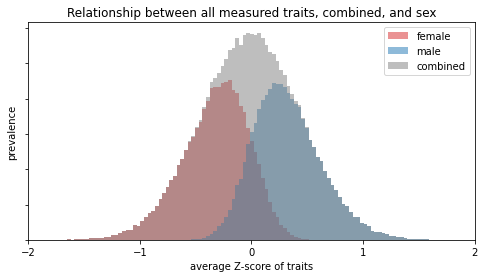

In [198]:
data = [
    [sum(s.traits)/len(s.traits) for s in samples],
    [sum(s.traits)/len(s.traits) for s in samples if s.sex == 'm'],
    [sum(s.traits)/len(s.traits) for s in samples if s.sex == 'f']
]
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(
    data,
    bins=120,
    histtype="stepfilled",
    color=["tab:gray", "tab:blue", "tab:red"],
    alpha=0.5
)
ax.set(
    title="Relationship between all measured traits, combined, and sex",
    xlim=(-2, 2),
    yticklabels=[],
    ylabel="prevalence",
    xticks=[-2, -1, 0, 1, 2],
    xlabel="average Z-score of traits"
)
ax.legend(["female", "male", "combined"])


plt.show()

Kirk pointed at the dark region in the bottom of the graph. “There’s still that
fifteen percent where Lieutenant Carmine’s model doesn’t predict sex correctly.
If she could just find the gene or hormone that controls all of these traits,
that error could be reduced to zero.”

“That’s what she’s looking for,” McCoy said.

“Such a single trait might not exist,” Spock said.

“How is that possible?” Kirk asked.

“Imagine a coin with ‘male’ written on one side and ‘female’ on the other,”
Spock said. “If I toss the coin twice, there is a fifty-percent chance that
‘male’ and ‘female’ will each appear once. But if I toss it
ten times, then the odds of exactly five ‘male’ and five ‘female’ results
is less than twenty-five percent.”

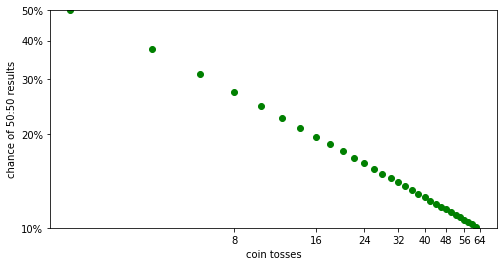

In [210]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(
    range(2, 64, 2),
    [
        math.comb(n * 2, n) * math.pow(0.5, n * 2)
        for n in range(1, 32)
    ],
    "go"
)
ax.set(
    xscale="log",
    xticks=(8, 16, 24, 32, 40, 48, 56, 64),
    xticklabels=["8", "16", "24", "32", "40", "48", "56", "64"],
    xlabel="coin tosses",
    ylim=(0.1, 0.5),
    yscale="log",
    yticks=(0.1, 0.2, 0.3, 0.4, 0.5),
    yticklabels=["10%", "20%", "30%", "40%", "50%"],
    ylabel="chance of 50:50 results"
)
ax.minorticks_off()
plt.show()

“By continuing to toss the coin, I am not revealing any male or female essence
hidden inside it. I am only revealing a law of statistics, namely, that the
sum of two random distributions has a greater variance than either of its terms.
Likewise, if the Butlerians perceive a large number of traits as masculine or
feminine, the sum of these traits creates a system of binary sex, even if
each trait is random and unimodal.”

Uhura’s console whistled. She touched her earpiece. “Transmission from the surface,
sir. Lieutenant Carmine for Dr. McCoy.”

“Put it on the speaker,” Kirk said. “Lieutenant! The doctor was just filling us in
on your work.”

“I might need to rewrite that entire paper, sir.” The lieutenant was practically
shouting into her communicator; in
the background, there was a cacaphony of singing voices.
“When news of my research project got around, I was contacted by
a devotee of Butler III’s minority religion, Foucauldianism. The Foucauldians
believe—well, they believe a lot of things, but one of them is that the bumpiness
of a person’s forehead should not be a factor in determining their sex.”

Spock made the smallest possible frown. “Such an inconsistency is not logical.”

“The majority,” Lieutenant Carmine said, “uses harsher words than ‘not logical.’
They call this religion a cult, a threat to the social order.”

As the xenobiologist spoke, the science officer pressed buttons on his console.

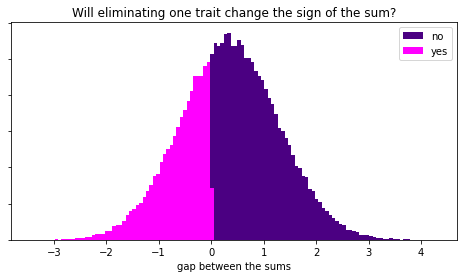

In [216]:
data = [
    (sum(s.traits) - sum(s.traits[0:-1])) * math.copysign(1.0, sum(s.traits))
    for s in samples
]
fig, ax = plt.subplots(figsize=(8, 4))
hdata = ax.hist(
    [
        [d for d in data if d < 0],
        [d for d in data if d >= 0],
    ],
    bins=120,
    histtype="barstacked",
    color=["magenta", "indigo"],
    label=["yes", "no"],
)
ax.set(
    title="Will eliminating one trait change the sign of the sum?",
    #xlim=(-2, 2),
    yticklabels=[],
    #xticks=[-2, -1, 0, 1, 2],
    xlabel='gap between the sums'
)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[handles[1], handles[0]])
plt.show()

“Captain,” he said. “The bright region on this chart represents my estimate of how many
Butlerians might have their sex reclassified if they changed to the Foucauldians’ schema.”

Lieutenant Carmine was saying: “Interest in this new religion has surged, possibly because
of all the human males with smooth foreheads that have been visiting. But that has led to
a conservative backlash. I’m inside one of their temples now.”

The background noise grew louder. It wasn’t singing; it was _chanting._ It was not the soothing
chant of worshippers at prayer, but the hoarse chant of an angry mob.

“Lieutenant,” said Spock, “do you require assistance?”

“I’m fine,” she said, as the chanting grew louder. Her voice became muffled: she seemed to
be speaking to someone else. “Go to the catacombs! I’ll hold them off here!”

Kirk punched a button on the arm of his chair. “Transporter room. Lock on to Lieutenant
Carmine’s signal. Prepare—”

Over the communicator, there was the whine of a phaser blast, then silence.